EDA
---

This notebook passes through each features in the used car data.

- [ListingID](#ListingID)
- [SellerCity](#SellerCity)

In [457]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#display options
pd.options.display.max_columns = 40
%matplotlib inline
plt.style.use('dark_background')

In [458]:
#import data
data_path = '../data/'
train_data_filename = 'Training_DataSet.csv'
test_data_filename = 'Test_Dataset.csv'

traindf = pd.read_csv(data_path + train_data_filename)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [459]:
#look at top of the list
traindf.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,False,White,Black,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",8.600069,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,True,Black,NaN,NaN,NaN,NaN,Gasoline,"1 Owner, Buyback Protection Eligible",2.920127,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,True,Brilliant Black Crystal Pearlcoat,Black,4x4/4WD,Regular Unleaded V-6 3.6 L/220,['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...,Gasoline,"1 Owner, Buyback Protection Eligible",28.107014,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,False,Diamond Black Crystal Pearlcoat,Black,4WD,3.6L V6,"['Android Auto', 'Antilock Brakes', 'Apple Car...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",59.816875,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,False,Radiant Silver Metallic,Cirrus,FWD,Gas V6 3.6L/222.6,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...",Gasoline,"1 Owner, Non-Personal Use Reported, Buyback Pr...",98.665301,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [18]:
#look at basic statistics of numeric data
traindf.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6.298000e+03,6298.000000,6298.000000,6296.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.318130e+06,4.138346,434.565576,45234.211722,56.143670,26369.364358,2016.792633,32265.053314
std,2.486031e+06,1.188033,1274.257411,20380.478191,68.301329,13036.568712,1.206566,7538.339005
min,3.287000e+03,0.000000,0.000000,1105.000000,0.293102,0.000000,2015.000000,18289.000000
25%,2.178112e+06,4.000000,28.000000,28806.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.298122e+06,4.600000,126.000000,46410.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,6.488249e+06,4.800000,401.000000,60126.000000,74.139769,36468.500000,2018.000000,35991.000000
max,8.620012e+06,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


---
# ListingID
---

<AxesSubplot:>

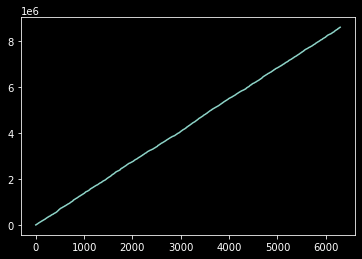

In [26]:
# 'ListingID' monotonically increases, approxmately linearly, with index.
testdf.ListingID.plot()

<AxesSubplot:>

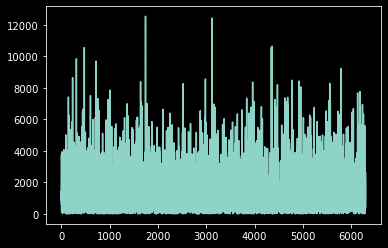

In [21]:
#Increase of subsequent IDs is always positive but variable.
testdf.ListingID.diff().plot()

<AxesSubplot:>

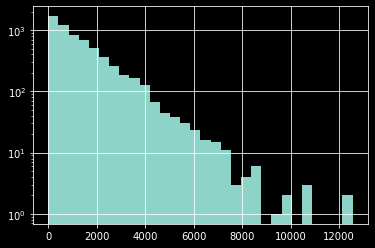

In [24]:
#The distribution of the increase is exponentially decaying with larger skips.
testdf.ListingID.diff().hist(bins = 30, log = True)

# SellerCity
These all appear to be USA cities. Top represented cities largely not from the west coast?

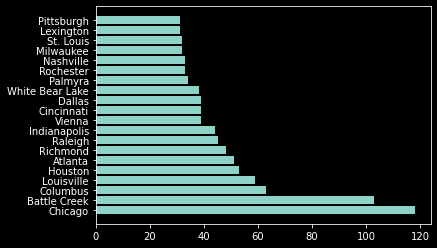

In [408]:
#plot number of instances of sales from the most represented cities
scvaluecounts = traindf.SellerCity.value_counts();
plot_limit = 20
plt.barh(scvaluecounts.index[:plot_limit], scvaluecounts[:plot_limit]);

In [400]:
#how many cities are represented?
len(traindf.SellerCity.unique())

1318

In [409]:
#how many cities have more than one sale?
scvaluecounts[scvaluecounts > 1]

Chicago         118
Battle Creek    103
Columbus         63
Louisville       59
Houston          53
               ... 
Richlands         2
Slinger           2
Yankton           2
North Aurora      2
Norwalk           2
Name: SellerCity, Length: 837, dtype: int64

In [410]:
#how many have more than 2 sales?
scvaluecounts[scvaluecounts > 2]

Chicago            118
Battle Creek       103
Columbus            63
Louisville          59
Houston             53
                  ... 
La Porte             3
Cumming              3
Gastonia             3
Cedarburg            3
Chester Springs      3
Name: SellerCity, Length: 618, dtype: int64

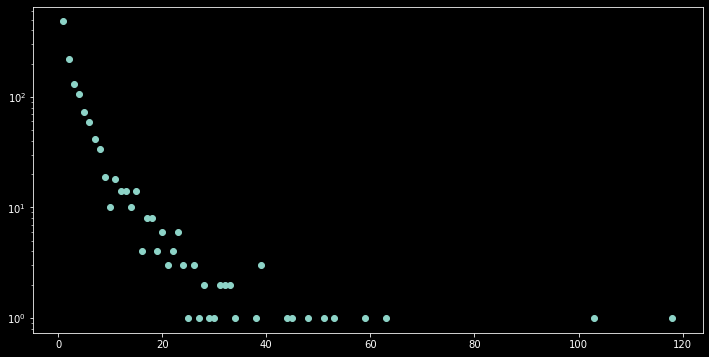

In [424]:
#look at value counts of value counts.
scvcvc = scvaluecounts.value_counts()

#plot how many cities (y) have x sales
fig, ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
plt.scatter(scvcvc.index, scvcvc)

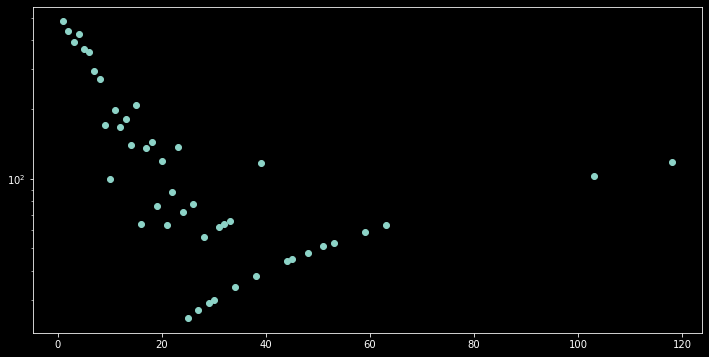

In [425]:
# plot how many sales come from a city with X sales (product of representation above with number of sales)
# the characteristic log shape for higher X comes from the values with only one city with that number.
fig, ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
plt.scatter(scvcvc.index, scvcvc*scvcvc.index)

(array([5., 1., 4., 3., 6., 3., 1., 0., 2., 0., 3., 0., 3., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.]),
 array([ 25.  ,  34.12,  43.24,  52.36,  61.48,  70.6 ,  79.72,  88.84,
         97.96, 107.08, 116.2 , 125.32, 134.44, 143.56, 152.68, 161.8 ,
        170.92, 180.04, 189.16, 198.28, 207.4 , 216.52, 225.64, 234.76,
        243.88, 253.  , 262.12, 271.24, 280.36, 289.48, 298.6 , 307.72,
        316.84, 325.96, 335.08, 344.2 , 353.32, 362.44, 371.56, 380.68,
        389.8 , 398.92, 408.04, 417.16, 426.28, 435.4 , 444.52, 453.64,
        462.76, 471.88, 481.  ]),
 <BarContainer object of 50 artists>)

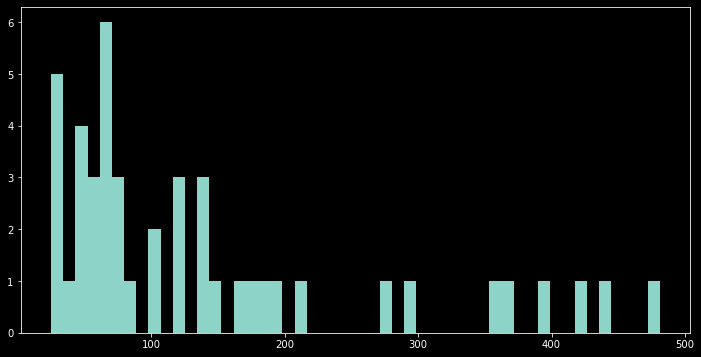

In [431]:
#the above might be a bit deceptive. look at a histogram to account for the different density of numbers.

#number of cit
fig, ax = plt.subplots(figsize = (12,6))
plt.hist(scvcvc*scvcvc.index, bins = 50);

In [443]:
# is there anything special about being sold from a high-sales city?
hi_sale_cutoff = 10
hi_sales_cities = traindf['SellerCity'].value_counts()[traindf['SellerCity'].value_counts() > hi_sale_cutoff].index

In [444]:
hi_sales_cities

Index(['Chicago', 'Battle Creek', 'Columbus', 'Louisville', 'Houston',
       'Atlanta', 'Richmond', 'Raleigh', 'Indianapolis', 'Vienna',
       ...
       'Zanesville', 'Saint Charles', 'Clarksville', 'Las Vegas',
       'Libertyville', 'Peoria', 'Lebanon', 'Fort Worth', 'Morton',
       'St Augustine'],
      dtype='object', length=145)

In [448]:
#get sales statistics only from high-sales (>10 records) cities
traindf[traindf['SellerCity'].apply(lambda city: city in hi_sales_cities.to_list())].describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,3.009000e+03,3009.000000,3009.000000,3008.000000,3008.000000,3009.000000,3009.000000,2998.000000
mean,4.291962e+06,4.191160,542.870721,44678.545213,50.280185,26324.096710,2016.751412,32027.573716
std,2.466114e+06,1.045314,1561.808993,18456.751465,61.876174,13126.526986,1.232329,7726.727166
min,3.287000e+03,0.000000,0.000000,1105.000000,0.479213,0.000000,2015.000000,18289.000000
25%,2.216114e+06,4.000000,39.000000,30046.000000,12.476131,16778.000000,2015.000000,26730.000000
50%,4.257188e+06,4.600000,169.000000,46410.000000,29.059792,25950.000000,2017.000000,30968.500000
75%,6.416095e+06,4.800000,556.000000,60126.000000,66.535735,36599.000000,2018.000000,35887.500000
max,8.620012e+06,5.000000,14635.000000,95661.000000,584.885208,71202.000000,2019.000000,89500.000000


In [447]:
#compare to statistics from low-sales cities.
traindf[traindf['SellerCity'].apply(lambda city: city not in hi_sales_cities.to_list())].describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,3.289000e+03,3289.000000,3289.000000,3288.000000,3288.000000,3287.000000,3289.000000,3248.000000
mean,4.342070e+06,4.090027,335.480693,45742.558698,61.507831,26410.803468,2016.830344,32484.254002
std,2.504249e+06,1.303289,926.068422,21984.019906,73.289885,12955.530841,1.181432,7354.561817
min,3.920000e+03,0.000000,0.000000,1545.000000,0.293102,0.000000,2015.000000,18450.000000
25%,2.127491e+06,3.900000,22.000000,28647.500000,14.191568,16857.500000,2016.000000,26990.000000
50%,4.343065e+06,4.600000,95.000000,46535.500000,38.428929,26219.000000,2017.000000,31962.500000
75%,6.538742e+06,4.900000,330.000000,60120.000000,81.486832,36389.000000,2018.000000,36000.000000
max,8.617378e+06,5.000000,13916.000000,99654.000000,820.684375,83037.000000,2019.000000,89480.000000


In [449]:
#with this (admittedly arbitrary) cutoff of cities with >10 sales in the set, cutting the records in about half, the mean dealer list price
# and std of sale price is about the same. 

In [451]:
#look at mean dealer sales for each city. look at high sales cities only since the mean isn't too meaningful for lower sales count ones.
unique_cities = traindf['SellerCity'].unique()
city_means = []
for city in unique_cities:
    city_means.append(
        traindf.loc[traindf['SellerCity'] == city, 'Dealer_Listing_Price'].mean()
    )
print(len(city_means), 'different city means')

1318 different city means


Text(0, 0.5, 'city Dealer listing price mean')

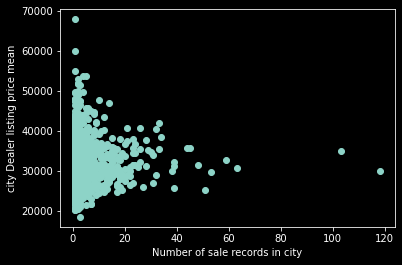

In [455]:
#plot city sale USD mean with number of sales
plt.scatter(traindf['SellerCity'].value_counts(), city_means)
plt.xlabel('Number of sale records in city')
plt.ylabel('city Dealer listing price mean')

In [456]:
#it looks like number of sales and the sale mean aren't related. Although higher sale count cities appear to be more
#in the middle, this is likely an artifact of averaging more sales.

---
# SellerIsPriv

If private seller. (Is a dealership a non-private seller?)

In [62]:
#Only 14 of the listings are listed as private. This may cause overfitting.
priv

False    6284
True       14
Name: SellerIsPriv, dtype: int64

In [70]:
# What are typical prices of these?
privateprices = traindf.loc[traindf['SellerIsPriv'] == 1, 'Dealer_Listing_Price' ]
privateprices.describe()

count       14.000000
mean     30310.214286
std       6223.299065
min      18699.000000
25%      27112.500000
50%      30700.000000
75%      34375.000000
max      42000.000000
Name: Dealer_Listing_Price, dtype: float64

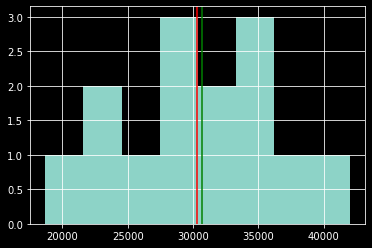

In [94]:
privateprices.hist(bins = 8)
plt.axvline(privateprices.mean(), color = 'red')
plt.axvline(privateprices.describe()['50%'], color = 'green')

In [95]:
#Compare this to the overall prices for the set later.

# SellerListSrc

In [98]:
#only a few different "seller listing source identifiers".
traindf.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [99]:
#two listings are NaN
# These also have SellerZip, VehSellerNotes, and VehTransmission as NaN.
traindf.loc[traindf['SellerListSrc'].isna()]

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
1125,1562581,Richmond,False,NaN,Pearson Chrysler Jeep Dodge RAM,1.0,4,VA,NaN,SUV,...,Jeep,38329.0,Grand Cherokee,Good Deal,NaN,Used,NaN,2017,Limited,26333.0
3855,5306897,Dearborn,False,NaN,Jack Demmer Lincoln,4.8,261,MI,NaN,SUV,...,Jeep,36678.0,Grand Cherokee,Fair Price,NaN,Used,NaN,2015,Limited,23500.0


---
# SellerName

In [104]:
#about 60% of the sellers only show once
len(traindf.SellerName.unique()), len(traindf.SellerName.unique())/len(traindf)

(2452, 0.3893299460146078)

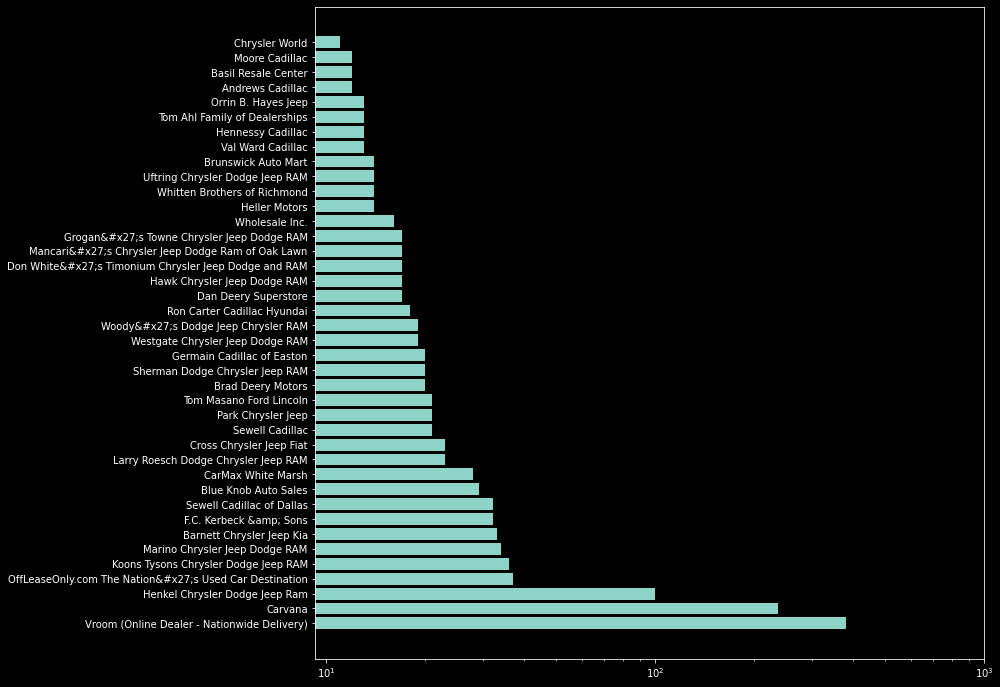

In [130]:
#Look at number of sales of instances from each seller type.
sellernamecounts = traindf.SellerName.value_counts()[:40]
plt.figure(figsize = (12,12))
plt.barh(sellernamecounts.index, sellernamecounts, log = True)
plt.xticks(np.logspace(1,3,3));

---
# SellerRating

In [131]:
traindf.SellerRating.describe()

count    6298.000000
mean        4.138346
std         1.188033
min         0.000000
25%         4.000000
50%         4.600000
75%         4.800000
max         5.000000
Name: SellerRating, dtype: float64

<AxesSubplot:>

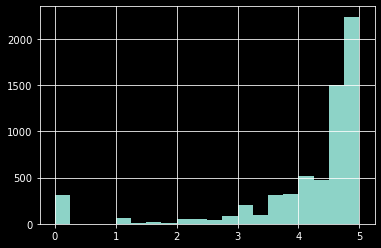

In [139]:
#look at rating distribution
traindf.SellerRating.hist(bins = 20)

Text(0, 0.5, 'sale price')

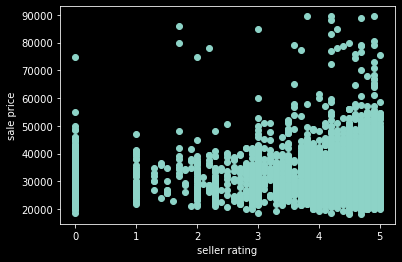

In [143]:
#Seller rating with avg sales price isn't directly correlated
plt.scatter(
    traindf.SellerRating,
    traindf['Dealer_Listing_Price']
)
plt.xlabel('seller rating')
plt.ylabel("sale price")

---
# SellerRevCnt

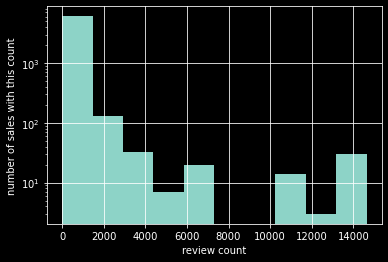

In [150]:
#look at distribution of review counts. these include repeat-counted values from the same seller.
traindf.SellerRevCnt.hist(log = True)
plt.xlabel('review count')
plt.ylabel('number of sales with this count');

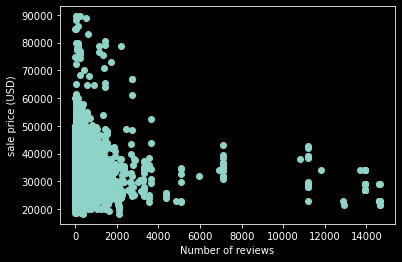

In [155]:
#price with review count
plt.scatter(
    traindf['SellerRevCnt'],
    traindf['Dealer_Listing_Price']
)
plt.xlabel('Number of reviews')
plt.ylabel('sale price (USD)');

---
# SellerState

In [176]:
## this is redone with state names and regions following

#look at all unique seller states and rates
# statevcs = traindf['SellerState'].value_counts()
# plt.figure(figsize = (6,12))
# plt.barh(statevcs.index, statevcs, log = True)

In [177]:
#import region table to look at regional representation
region_filepath = '../us-census-regions-divisions.csv'
regions = pd.read_csv(region_filepath)
regions.set_index('State Code', inplace=True)
#take a look to see it worked
regions.head()

,State,Region,Division
State Code,,,
AK,Alaska,West,Pacific
AL,Alabama,South,East South Central
AR,Arkansas,South,West South Central
AZ,Arizona,West,Mountain
CA,California,West,Pacific


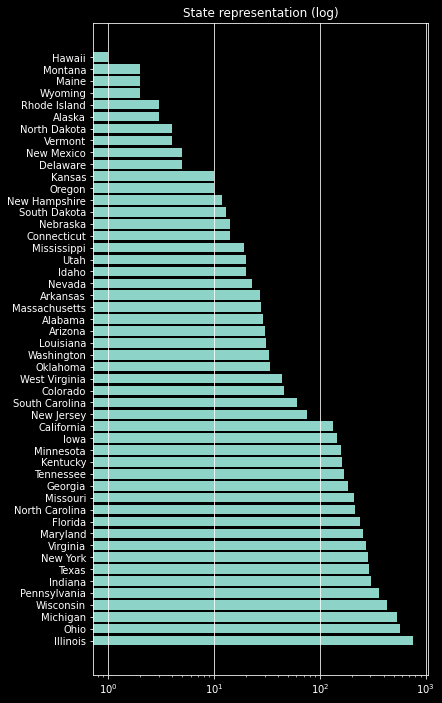

In [188]:
#join regions onto data to see representation of states and view
regiondata = traindf.join(regions, on = 'SellerState')[['SellerState', 'State', 'Region', 'Division']]
statesvcs = regiondata['State'].value_counts()
plt.figure(figsize=(6,12))
plt.barh(statesvcs.index, statesvcs, log = True)
plt.title("State representation (log)");
plt.grid(b = True, axis ='x')

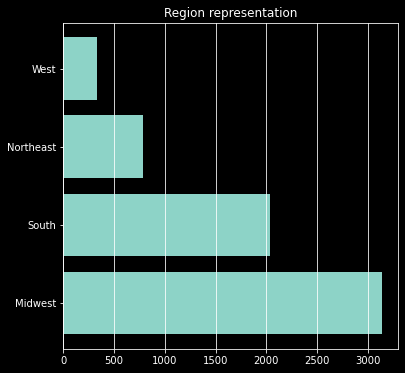

In [191]:
# look at region representations
regvcs = regiondata['Region'].value_counts()
plt.figure(figsize = (6,6))
plt.barh(regvcs.index, regvcs, log = False)
plt.title('Region representation')
plt.grid(b = True, axis = 'x')

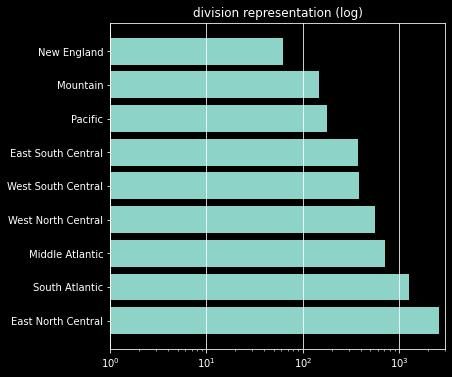

In [200]:
divvcs = regiondata['Division'].value_counts()
plt.figure(figsize = (6,6))
plt.barh(divvcs.index, divvcs, log = True)
plt.title('division representation (log)')
plt.grid(b = True, axis = 'x')
plt.xlim(1,3000);

---
# SellerZip

Most of the listings do not have a zip --- this may be influenced by online sales.

Zip is highly related to seller and other location values.

In [206]:
#look at common zips
traindf['SellerZip'].value_counts().head(20)

49037.0    101
55110.0     40
22182.0     39
60641.0     35
75209.0     33
60606.0     33
8065.0      32
30303.0     31
20817.0     29
16635.0     29
21162.0     28
44118.0     27
60126.0     25
60603.0     24
55337.0     23
40218.0     23
43219.0     23
60453.0     22
60010.0     22
77079.0     22
Name: SellerZip, dtype: int64

In [202]:
traindf['SellerName'].value_counts()

Vroom (Online Dealer - Nationwide Delivery)                381
Carvana                                                    236
Henkel Chrysler Dodge Jeep Ram                             100
OffLeaseOnly.com The Nation&#x27;s Used Car Destination     37
Koons Tysons Chrysler Dodge Jeep RAM                        36
                                                          ... 
Liberty Buick GMC                                            1
Ray Skillman KIA Mitsubishi                                  1
West Herr Toyota of Orchard Park                             1
Raymond Chevrolet-Kia                                        1
Foster Chevrolet Cadillac                                    1
Name: SellerName, Length: 2452, dtype: int64

---
# VehBodystyle

Every listing is SUV body style. This is a useless column.

In [211]:
traindf['VehBodystyle'].value_counts()

SUV    6298
Name: VehBodystyle, dtype: int64

---
# VehCertified

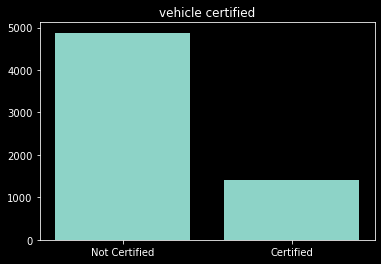

In [218]:
certvcs = traindf['VehCertified'].value_counts()
plt.bar(['Not Certified', 'Certified'], certvcs)
plt.title("vehicle certified");

---
# VehColorExt

There are a lot of exterior colors. It will be good to reduce these to subproperties like:

- general color
- descriptive words like metallic, clearcoat, crystal, pearlcoat or Pearl Coat/Coat Pearl, tintcoat/tri-coat/tricoat/3-coat, tricoa,
- texture words like Cashmere, Velvet, Frost, Pearl, ivory
- extra sexy words like diamond, maximum, sangria (?), Stellar, Radiant, Passion, ** night edition **, midnight sky
    - find out which extra descriptive words are true descriptors or simply marketing.

It also appears that roof camera information is included in some of these.

In [237]:
def value_count_barplot(series, h = True, title = "plot title", log = False, figsize = (12,6)):
    plt.figure(figsize = figsize)
    this_value_counts = series.value_counts()
    if h:
        plot = plt.barh
    else:
        plot = plt.bar
    plot(this_value_counts.index, this_value_counts, log = log)
    plt.title(title)

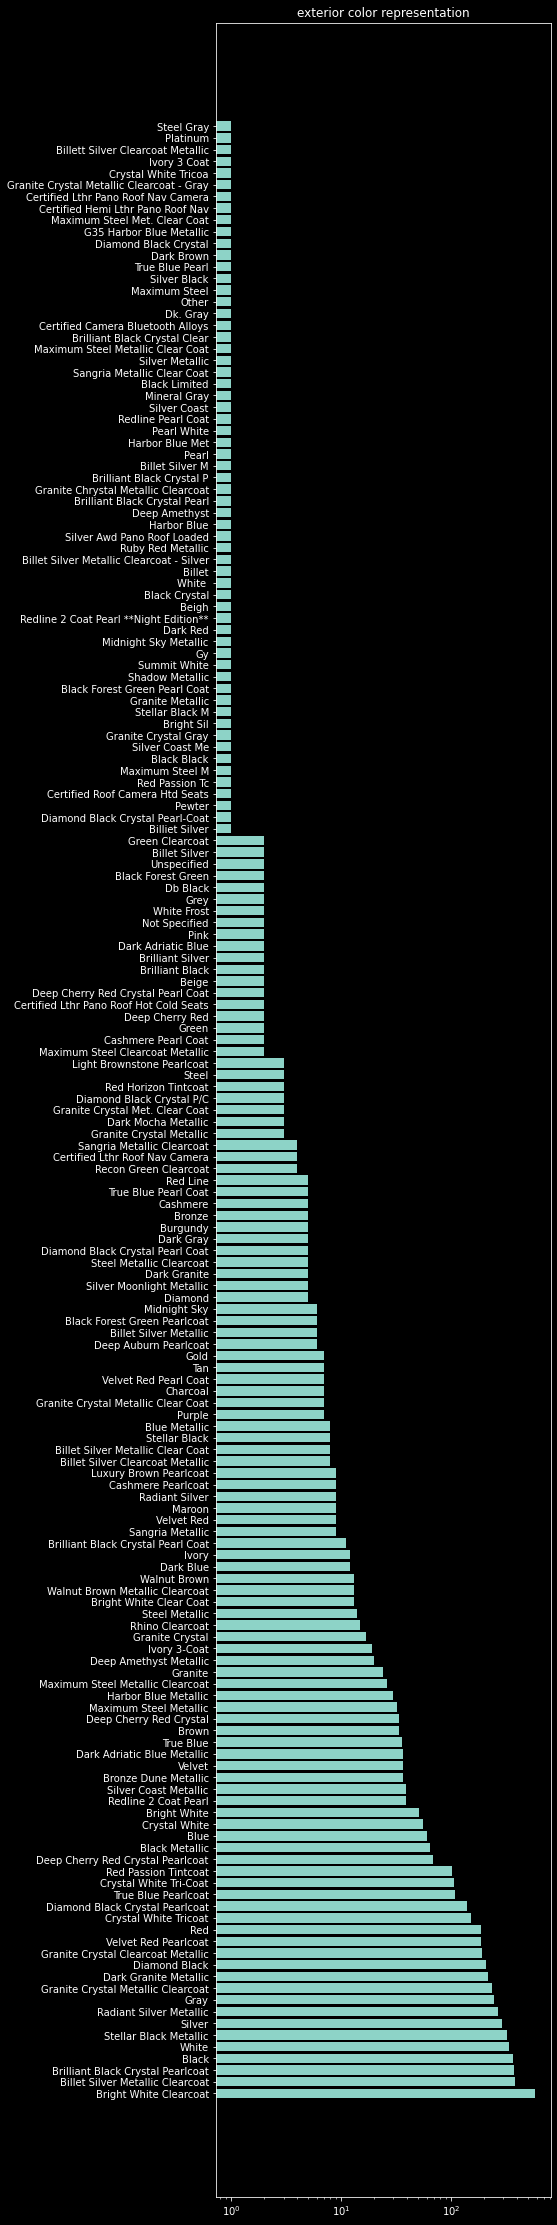

In [238]:
colorevcs = traindf['VehColorExt'].value_counts()
value_count_barplot(traindf['VehColorExt'], title = "exterior color representation", log = True, figsize = (6,40))

---
# VehColorInt

Separate these into color and texture as well. Many are overlapping, for instance the repeat 'black' types.

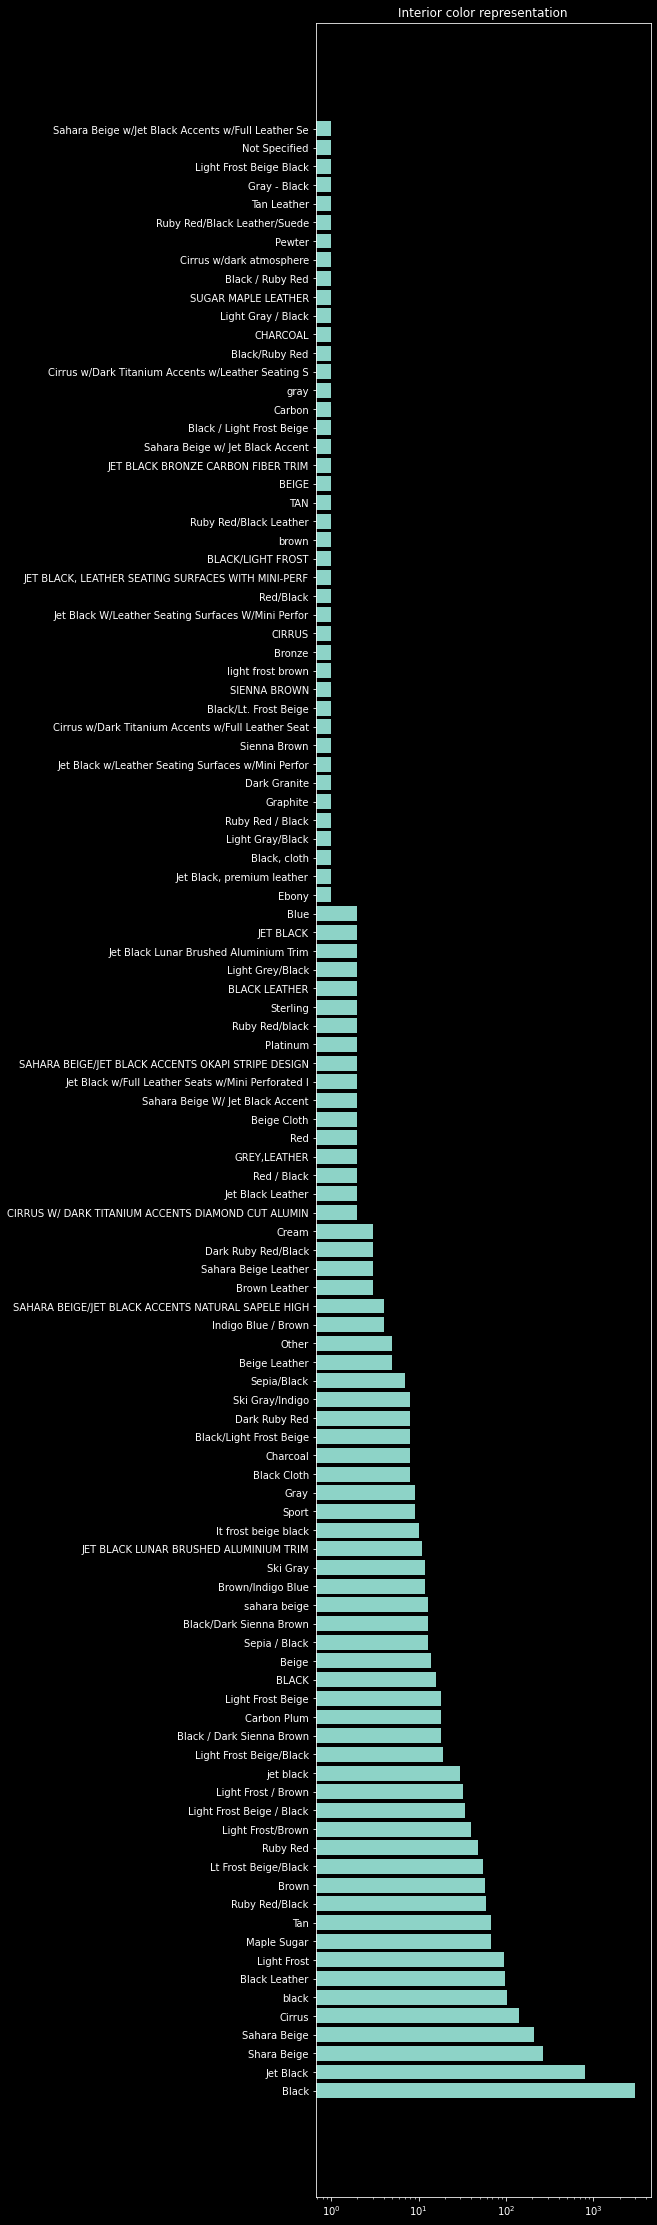

In [239]:
value_count_barplot(traindf['VehColorInt'], title = 'Interior color representation', log = True, figsize = (6,40))

---
# VehDriveTrain

some of these are repeats, such as many different ways of writing All Wheel Drive.
Some are overlapping or ambiguous, such as 2WD. Is that FWD or RWD?

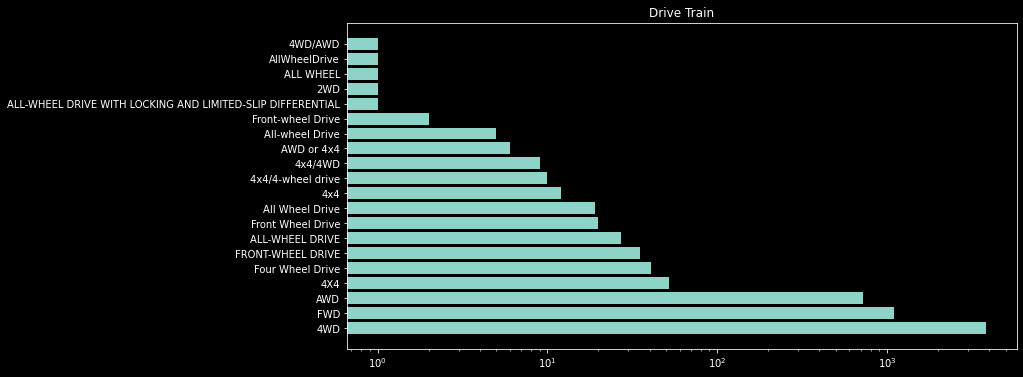

In [240]:
value_count_barplot(traindf['VehDriveTrain'], title = 'Drive Train', log = True)

---
# VehEngine

Engine can be split into a few features:

- volume
- number of cylinders
- horsepower
- special (HEMI, supercharged, MDS == Multi displacement, vvt variable valve timing, DI diesel direct, natural aspiration, mpfi multi port, DOHC dual overhead camshaft )

These are tough because most cars may have DOHC, certainly they all have "horsepower", but not every entry reports them.

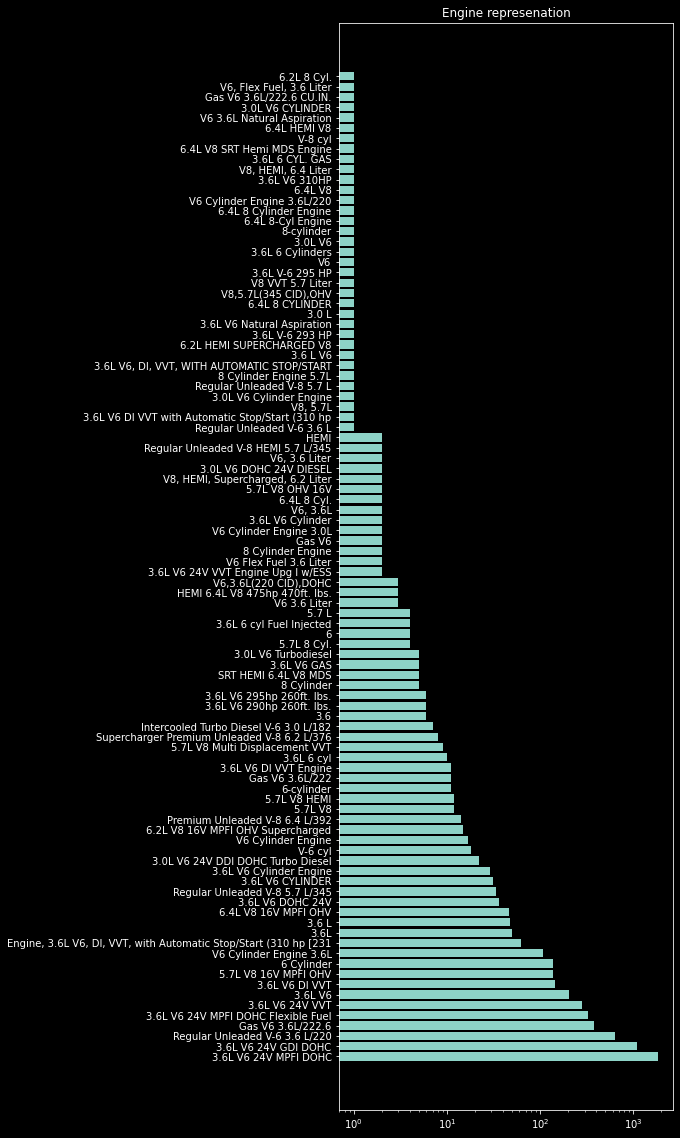

In [242]:
value_count_barplot(traindf['VehEngine'], title = 'Engine represenation', log = True, figsize = (6,20))

---
# VehFeats

Lot of good info here. It appears to be well-written and organized --- information filled automatically rather than written manually like the previous. These should be flattened for value counts.

In [270]:
#turn these objects into lists 
#
traindf['VehFeats'] = traindf['VehFeats'].dropna().apply(lambda entry: eval(entry))

In [294]:
# create a flat list of all feats
feat_list = [
    feat for feats in traindf['VehFeats'].dropna() for feat in feats
]
#make that list a series to easily count values
featvcs = pd.Series(feat_list).value_counts()
#look at those value counts
featvcs.head(20)

Audio controls on steering wheel        3485
ABS and Driveline Traction Control      3479
1st and 2nd row curtain head airbags    3479
4-wheel ABS Brakes                      3479
Braking Assist                          2322
Auxilliary engine cooler                1857
Audio system memory card slot           1778
Anti-theft alarm system                 1692
Antilock Brakes                         1162
Auxiliary Input                          962
Audio Controls On Steering Wheel         908
Bucket front seats                       888
Backup Camera                            878
Automatic front air conditioning         833
Bluetooth                                827
AM/FM/Satellite-prep Radio               703
AM/FM Stereo                             686
Aluminum Wheels                          664
ABS                                      633
Alloy Wheels                             624
dtype: int64

---
# VehFuel

There is an unknown entry that is not used often, this can be mixed with NaN.

In [297]:
traindf.loc[traindf['VehFuel'].isna(), 'VehFuel']

1125    NaN
3855    NaN
Name: VehFuel, dtype: object

In [298]:
traindf['VehFuel'].value_counts()

Gasoline         5902
E85 Flex Fuel     343
Diesel             41
Unknown            10
Name: VehFuel, dtype: int64

---
# VehHistory

string split this over number of previous owners, as well as other features to track. Looks regulated (not manually entered)

In [305]:
traindf['VehHistory'].head(10)

0    1 Owner, Non-Personal Use Reported, Buyback Pr...
1                 1 Owner, Buyback Protection Eligible
2                 1 Owner, Buyback Protection Eligible
3    1 Owner, Non-Personal Use Reported, Buyback Pr...
4    1 Owner, Non-Personal Use Reported, Buyback Pr...
5    1 Owner, Non-Personal Use Reported, Buyback Pr...
6    1 Owner, Accident(s) Reported, Non-Personal Us...
7    1 Owner, Non-Personal Use Reported, Buyback Pr...
8    1 Owner, Non-Personal Use Reported, Buyback Pr...
9    1 Owner, Non-Personal Use Reported, Buyback Pr...
Name: VehHistory, dtype: object

---
# VehListdays

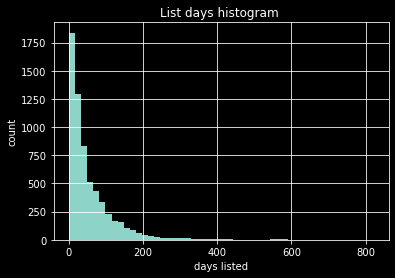

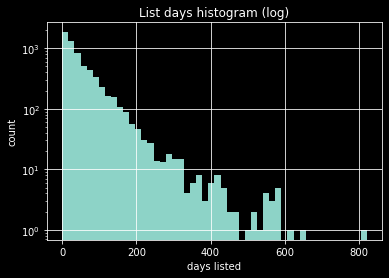

In [318]:
#look at distribution of listed days
traindf['VehListdays'].hist(bins = 50, log = False)
plt.title('List days histogram ');
plt.xlabel('days listed')
plt.ylabel('count');
plt.show()

traindf['VehListdays'].hist(bins = 50, log = True)
plt.title('List days histogram (log)');
plt.xlabel('days listed')
plt.ylabel('count');
plt.show()

Text(0, 0.5, 'listing price')

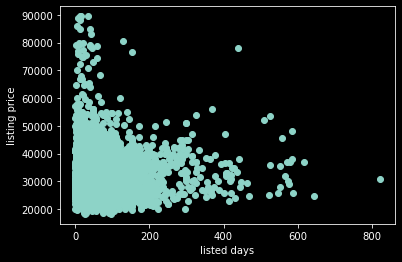

In [322]:
#look at listed days with price. high price ones may go faster.
plt.scatter(traindf['VehListdays'], traindf['Dealer_Listing_Price'])
plt.xlabel('listed days')
plt.ylabel('listing price')

---
# VehMake

Only Jeeps and Cadillacs. None missing. About twice as many Jeeps.

In [326]:
makevcs = traindf['VehMake'].value_counts()
makevcs

Jeep        4199
Cadillac    2099
Name: VehMake, dtype: int64

---
# VehMileage

What happens after 50,000 miles? Something special? There is a big dropoff in listings there.

The prices for the long-milage ones do not sink as low as the lowest pre-50k ones. These must be cars with something extra special.


Text(0, 0.5, 'count')

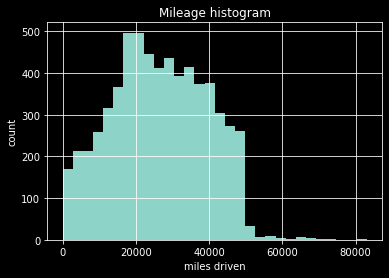

In [332]:
traindf['VehMileage'].hist(bins = 30)
plt.title('Mileage histogram')
plt.xlabel("miles driven")
plt.ylabel('count')

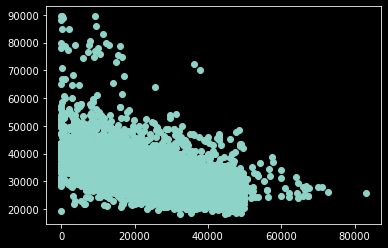

In [333]:
#mileage with price
plt.scatter(traindf['VehMileage'], traindf['Dealer_Listing_Price'])

In [339]:
#cars with milage >50k are all cadillacs.
traindf.loc[traindf['VehMileage'] > 50000].head(40)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
256,345995,Tinley Park,False,Digital Motorworks (DMi),Rizza Cadillac Buick GMC,4.7,878,IL,60487.0,SUV,...,Cadillac,59961.0,XT5,Good Deal,CARFAX One-Owner. Clean CARFAX. Certified. Sil...,Used,8-Speed Automatic,2017,Premium Luxury,33950.0
324,436722,Denton,False,HomeNet Automotive,James Wood AutoPark,4.9,1149,TX,76210.0,SUV,...,Cadillac,64637.0,XT5,Good Deal,PREVIEWFUEL EFFICIENT 27 MPG Hwy/19 MPG City! ...,Used,8-Speed Automatic,2017,Premium Luxury FWD,29477.0
672,916691,Beavercreek,False,Digital Motorworks (DMi),Jeff Schmitt Cadillac,4.9,233,OH,45434.0,SUV,...,Cadillac,57585.0,XT5,Fair Price,***FULLY LOADED AND EXTREMELY WELL TAKEN CARE ...,Used,8-Speed Automatic,2017,Platinum,38800.0
805,1118526,Rexburg,False,Digital Motorworks (DMi),Taylor Chevrolet,4.8,35,ID,83440.0,SUV,...,Cadillac,53503.0,XT5,Great Deal,"AWD, KEYLESS ENTRY, PUSH START, NAVIGATION, XM...",Used,8-Speed Automatic,2017,Premium Luxury,32499.0
849,1170358,Springfield,False,Digital Motorworks (DMi),Reliable Chevrolet,4.0,180,MO,65807.0,SUV,...,Cadillac,71202.0,XT5,Good Deal,"***Bluetooth***, AM/FM radio: SiriusXM, Blind ...",Used,8-Speed Automatic,2017,Premium Luxury,27985.0
1060,1467405,Salisbury,False,Digital Motorworks (DMi),CARmazone,4.6,64,NC,28147.0,SUV,...,Cadillac,64340.0,XT5,Fair Price,"Recent Arrival! **HEATED LEATHER SEATS**, **FW...",Used,8-Speed Automatic,2017,Luxury,25972.0
1089,1499976,Pompano Beach,False,Digital Motorworks (DMi),CarMax Sample Road,2.0,2,FL,33064.0,SUV,...,Cadillac,55999.0,XT5,Good Deal,CarMax makes car buying easy and hassle-free. ...,Used,8-Speed Automatic,2017,Base,26998.0
1127,1564437,Salisbury,False,Digital Motorworks (DMi),CARmazone,4.6,64,NC,28147.0,SUV,...,Cadillac,61999.0,XT5,Good Deal,"Recent Arrival! **HEATED LEATHER SEATS**, **FW...",Used,8-Speed Automatic,2017,Luxury,25972.0
1426,1949908,Anderson,False,HomeNet Automotive,Ed Martin Chevrolet Cadillac,4.7,238,IN,46013.0,SUV,...,Cadillac,59851.0,XT5,Good Deal,2017 Cadillac XT5 Premium Luxury Red Passion T...,Used,8-Speed Automatic,2017,Premium Luxury AWD,31340.0
1649,2297265,Smithtown,False,HomeNet Automotive,King O&#x27;Rourke Auto Group,3.8,55,NY,11787.0,SUV,...,Cadillac,53783.0,XT5,Good Deal,"For over 30 years, King O&#x27;Rourke has been...",Used,8-Speed Automatic,2017,Premium Luxury AWD,31995.0


---
# VehModel

All cars are either Jeep Grand Cherokee or Cadillac XT5s.

In [340]:
traindf['VehModel'].value_counts()

Grand Cherokee    4199
XT5               2099
Name: VehModel, dtype: int64

---
# VehPriceLabel

Many of these are missing. Missing ones may all be the same, probably a "bad deal".

In [344]:
traindf['VehPriceLabel'].value_counts()

Good Deal     4488
Great Deal     844
Fair Price     681
Name: VehPriceLabel, dtype: int64

<AxesSubplot:>

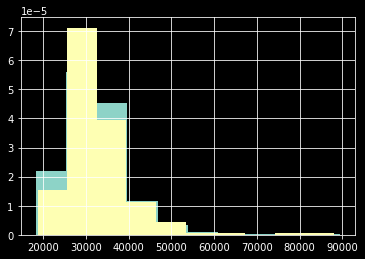

In [361]:
traindf['Dealer_Listing_Price'].hist(density = True)
traindf[traindf['VehPriceLabel'].isna()]['Dealer_Listing_Price'].hist(density = True)

<AxesSubplot:>

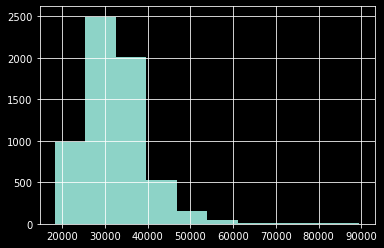

---
# VehSellerNotes

This will be tough to parse, as it's seller specific and manually entered. Much of this information is likely copied in other features (history, feats, colors,...).
It may be valuable to look through some to see if there is any unusual words to grab onto.

In [368]:
traindf['VehSellerNotes']

0                                                     NaN
1       Come take a look at our great pre-owned invent...
2       Backed by a rigorous 125-point inspection by f...
3       Drop by to see us and you will quickly see how...
4       Luxury, Exterior Parking Camera Rear, Front Du...
                              ...                        
6293    ****ALL BLACK EDITION****You are viewing a bea...
6294    CarMax makes car buying easy and hassle-free. ...
6295    Clean CARFAX. Certified. Black 2018 Cadillac X...
6296    Black 2017 Cadillac XT5 Luxury FWD 8-Speed Aut...
6297    With Vroom, you can buy your next car from the...
Name: VehSellerNotes, Length: 6298, dtype: object

In [367]:
traindf['VehSellerNotes'][4]

'Luxury, Exterior Parking Camera Rear, Front Dual Zone A/C, Heated Steering Wheel, Leather Seating Surface, Heated Front Seats, Memory Seat, Navigation System, Power Moonroof, Remote Keyless Entry. CARFAX One-Owner. Clean CARFAX. 26/19 Highway/City MPGFaster. Simpler. More Transparent. Superior Automotive Group has helped thousands of customers find the right car by leveraging one of Arkansas&#x27; largest selections of new and pre-owned vehicles at unparalleled prices. Yet, it&#x27;s our extra-mile customer service and uncommonly candid and respectful staff that have won the trust and loyalty of Arkansas drivers for 30 years. Come visit one of our Superior dealerships today and let us exceed your expectations. Superior BuickGMC is committed to making the purchase of your new vehicle easy for you. No matter where you are in your purchase decision, we are here to assist you. Let us know if you have any questions about this vehicle or any other vehicle in our inventory.Superior has over 

---
# VehType

Useless. They're all used cars.

In [370]:
traindf['VehType'].value_counts()

Used    6298
Name: VehType, dtype: int64

---
# VehTransmission

It looks like most of these are like drivetrain --- manually entered, with a lot of overlap due to typos and other ways of writing. These can be reduced to a smaller number of transmissions.

In [371]:
traindf['VehTransmission'].value_counts()

8-Speed Automatic                4395
8-Speed Automatic w/OD            676
Automatic                         523
AUTOMATIC                         103
8-Speed Shiftable Automatic        86
Automatic 8-Speed                  72
8-SPEED A/T                        64
8-Speed A/T                        53
8-Speed Automatic (845RE)          50
8-Speed Automatic (850RE)          11
8-Speed                            11
Automatic, 8-Spd                    7
8-Spd TorqueFlite Automatic         7
8 Speed Automatic                   7
8-Speed Automatic (8HP70)           5
Not Specified                       5
8-SPEED AUTOMATIC                   4
6-Speed Automatic                   2
Automanual                          2
A                                   2
Select                              2
8 speed automatic                   2
Shiftable Automatic                 2
8-Spd Auto 850RE Trans (Make)       1
aujtomatic                          1
Auto                                1
Automatic w/

---
# VehYear

Straightforward model year. This could be turned into dummies (each model is different). It is not the year it was manufactured, so it cannot be turned into a vehicle age. Mileage is perhaps a better estimator of effective age as it relates to value.

In [372]:
traindf['VehYear'].value_counts()

2018    2084
2017    1996
2015    1577
2016     506
2019     135
Name: VehYear, dtype: int64

---
# Vehicle_Trim

Some of the trims could be treated as their own dummies, but to prevent overfitting we should avoid some, such as "limited X" Perhaps these could be consolidated into their own category, or merged with "limited," etc.

In [374]:
traindf['Vehicle_Trim'].value_counts()

Limited                             1912
Premium Luxury                       747
Laredo                               704
Luxury                               645
Overland                             381
Altitude                             325
Summit                               242
Trailhawk                            178
Base                                 159
Platinum                             131
High Altitude                         86
SRT                                   76
Luxury FWD                            53
FWD                                   49
Laredo E                              47
Premium Luxury FWD                    35
Trackhawk                             30
Sterling Edition                      26
Luxury AWD                            22
Platinum AWD                          13
Premium Luxury AWD                     9
75th Anniversary                       8
Limited 75th Anniversary Edition       5
SRT Night                              3
Upland          

---
# Dealer_Listing_Price

the target. people don't like selling around \$30k?

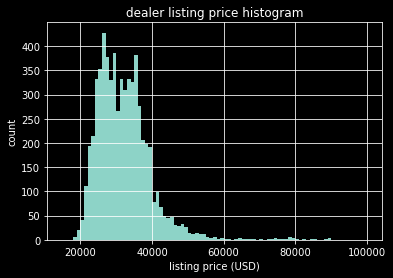

In [392]:
traindf['Dealer_Listing_Price'].hist(bins = np.linspace(15000,100000,86));
plt.title("dealer listing price histogram")
plt.xlabel("listing price (USD)")
plt.ylabel('count');

---

<AxesSubplot:>

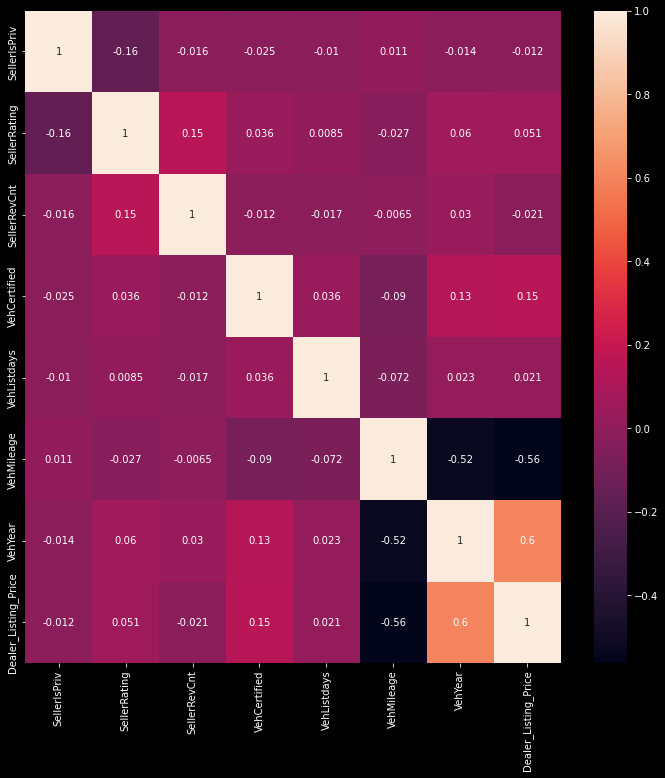

In [398]:
correlation_features = ['SellerIsPriv', 'SellerRating', 'SellerRevCnt','VehCertified','VehListdays','VehMileage','VehYear','Dealer_Listing_Price']
corr = traindf[correlation_features].corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot=True)

In [27]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [ ]:
a